# Plotting integrand of radiation transform for delta impulse

Here we examine the radiation integral associated with input function f(x):
In this notebook we let f(x) be the delta function at source point $s$: $f_{s}(x) = \delta(x - s)$ and plot the resulting integrand at z=0, x=s, which is just the sum of the squared radiation modes of each class:

$$ u_\mathcal{A}(s,Z)^2 + u_\mathcal{B}(s,Z)^2.$$

## And then do Contour Integral formation of Leaky modes

That's the second part, after we see that our method does give convergent leaky modes for the delta impulse.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plotlogf, plot_complex, plotlogf_real
from scipy.optimize import newton
from IPython.display import Video

plt.style.use('dark_background')
%matplotlib widget

In [2]:
A = SlabExact(scale=1e-6, Ts=[2., 2., 2.], ns=[1.44, 1, 1.44], wl=1e-6, xrefs=[300, 500, 300], symmetric=True)


## Integrand function

In [3]:
def integrand0(Z, s=-2, x=-2, paper_method=False):
    FsA = A.fields_Z(Z, paper_method=paper_method, mode_type='radiation')
    FsB = A.fields_Z(Z, paper_method=paper_method, mode_type='radiation', sign='-1')
    return FsA(s) * FsA(x) + FsB(s) * FsB(x)

def integrand(Z, s=-2, x=-2, paper_method=False):
    uAs = A.evaluate_fields_Z(Z, X=s, paper_method=paper_method, mode_type='radiation')
    uAx = A.evaluate_fields_Z(Z, X=x, paper_method=paper_method, mode_type='radiation')

    uBs = A.evaluate_fields_Z(Z, X=s, paper_method=paper_method, mode_type='radiation', sign='-1')
    uBx = A.evaluate_fields_Z(Z, X=x, paper_method=paper_method, mode_type='radiation', sign='-1')
    
    return uAs * uAx + uBs * uBx

In [10]:
s = 0
x = 0,
paper_method=False

args = (s, x, paper_method)

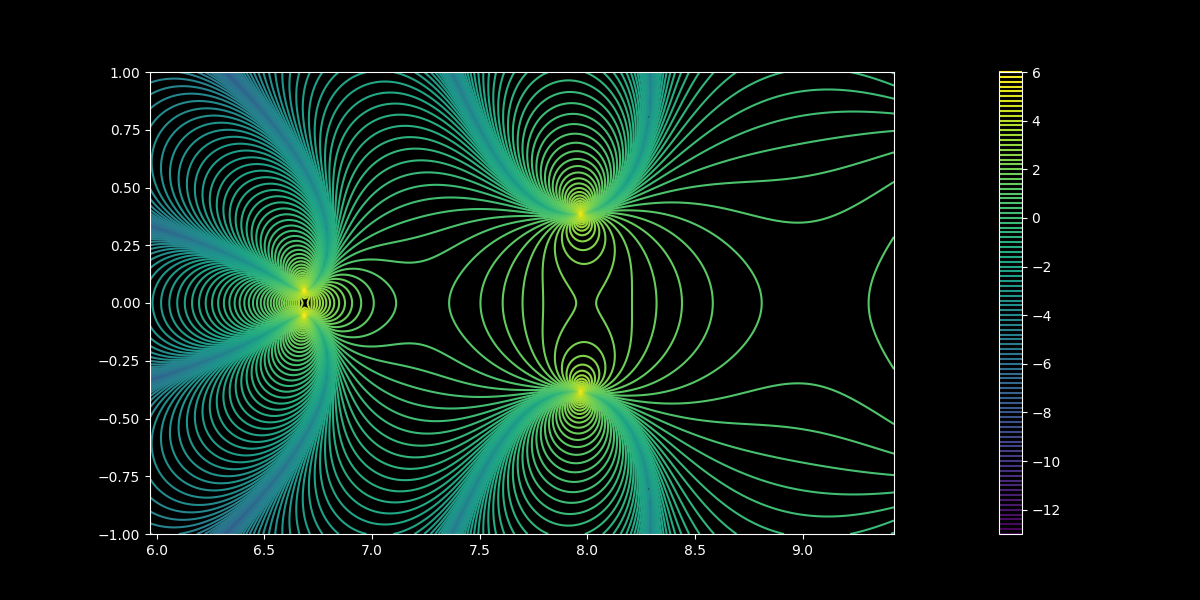

In [11]:
plotlogf(integrand, .95*A.K_low, 1.5*A.K_low, -1, 1, *args, iref=300, rref=300, levels=120, part='real', 
         facecolor='k', grid=False);
# plt.plot(-Z.real, -Z.imag, 'ro');

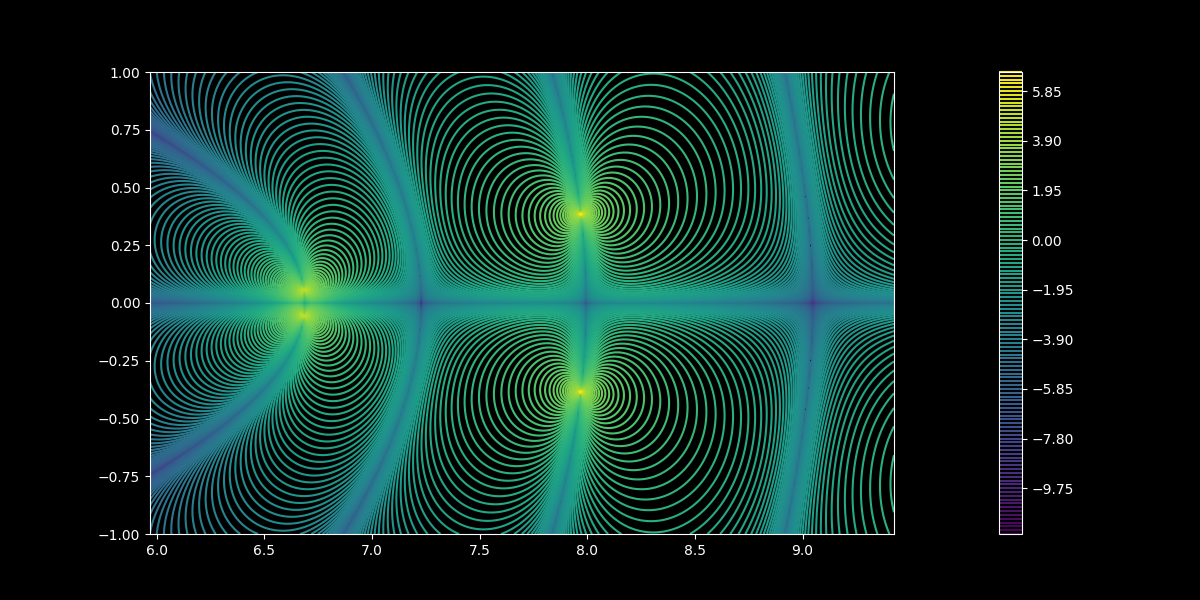

In [12]:
plotlogf(integrand, .95*A.K_low, 1.5*A.K_low, -1, 1, *args, iref=300, rref=300, levels=120, part='imag',
         facecolor='k', grid=False);
# plt.plot(-Z.real, -Z.imag, 'ro');

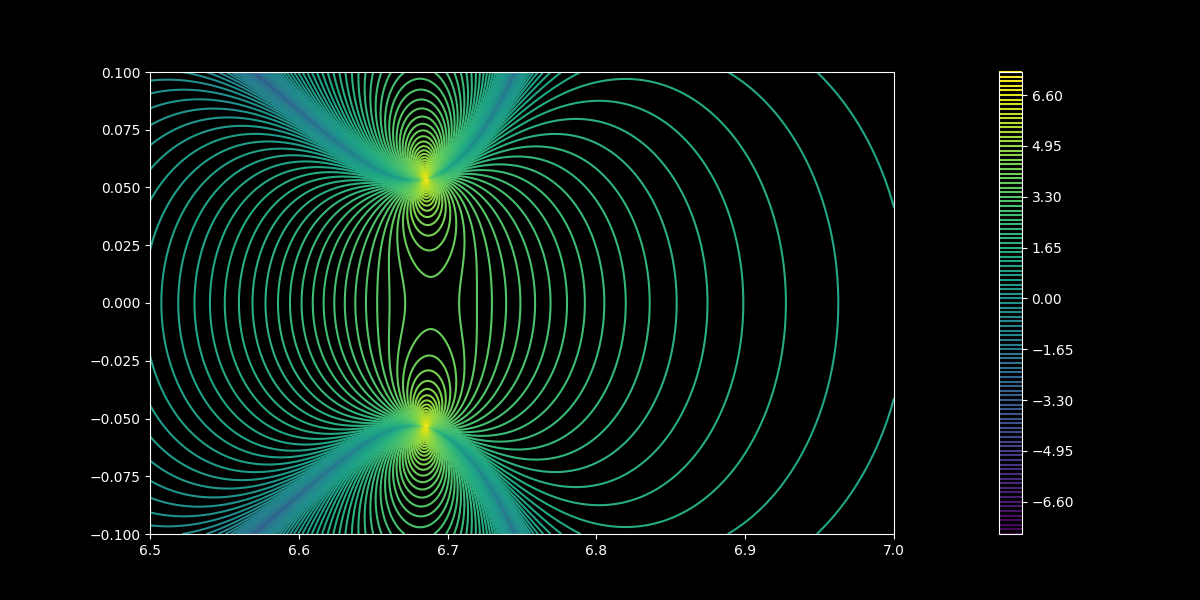

In [13]:
plotlogf(integrand, 6.5, 7, -.1, .1, *args, iref=300, rref=300, levels=120, part='real',
         facecolor='k', grid=False);
# plt.plot(Z.real, Z.imag, 'ro');

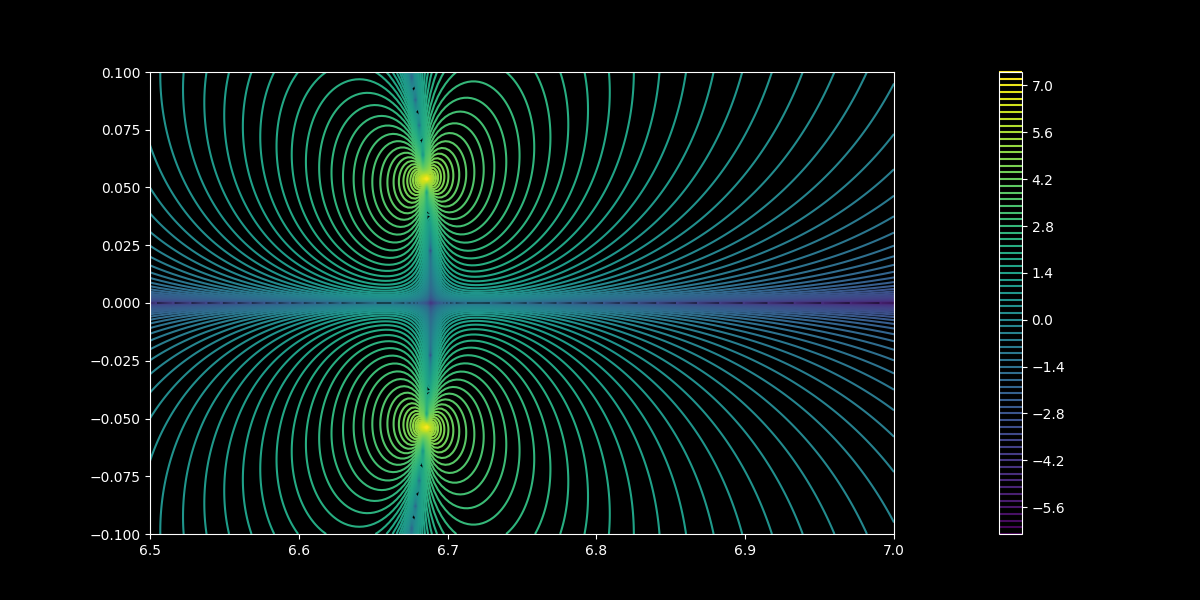

In [14]:
plotlogf(integrand, 6.5, 7, -.1, .1, *args, iref=200, rref=200, levels=70, part='imag',
         facecolor='k', grid=False);
# plt.plot(Z.real, Z.imag, 'ro');

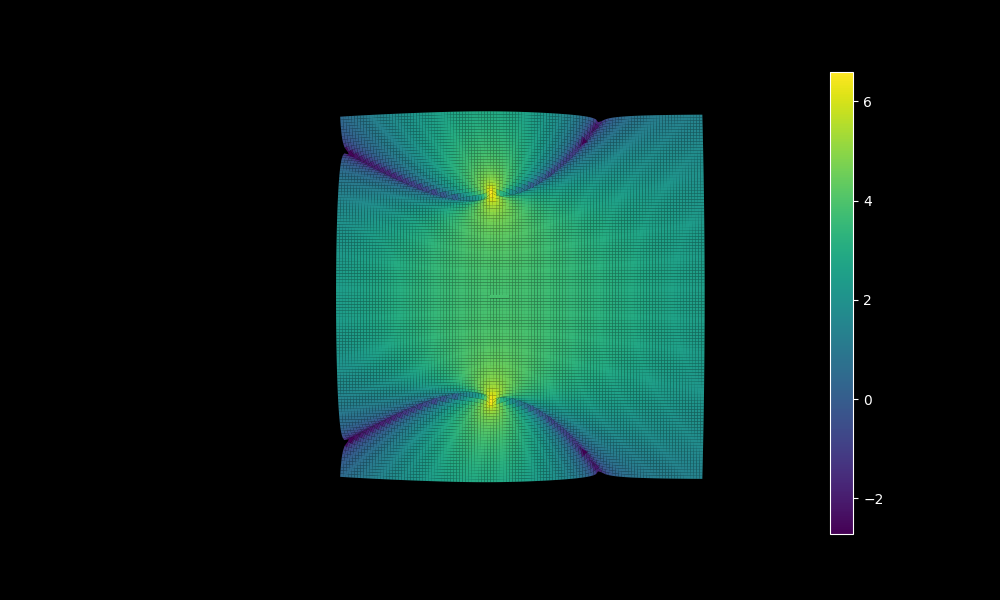

In [15]:
plotlogf(integrand, 6.6, 6.8, -.1, .1, *args, iref=120, rref=120,  part='real',
        three_D=True, rstride=1, cstride=1, figsize=(10,6), elev=90, azim=-90, roll=0)

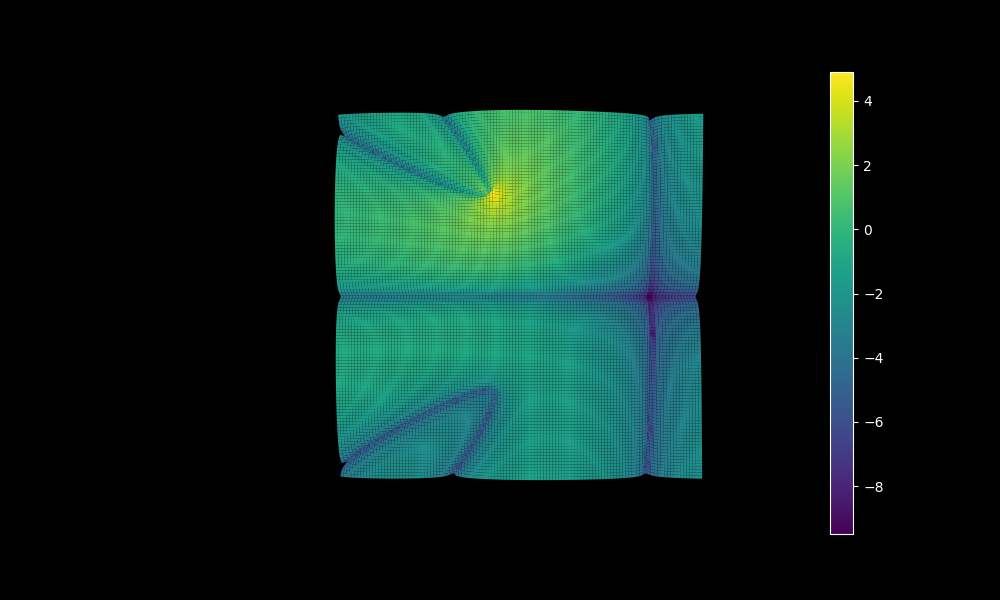

In [74]:
plotlogf(integrand, 6.6, 6.8, -.1, .1, *args, iref=120, rref=120,  part='imag', 
        three_D=True, rstride=1, cstride=1, figsize=(10,6), elev=90, azim=-90, roll=0)

## Contour integration around pole

Find pole location

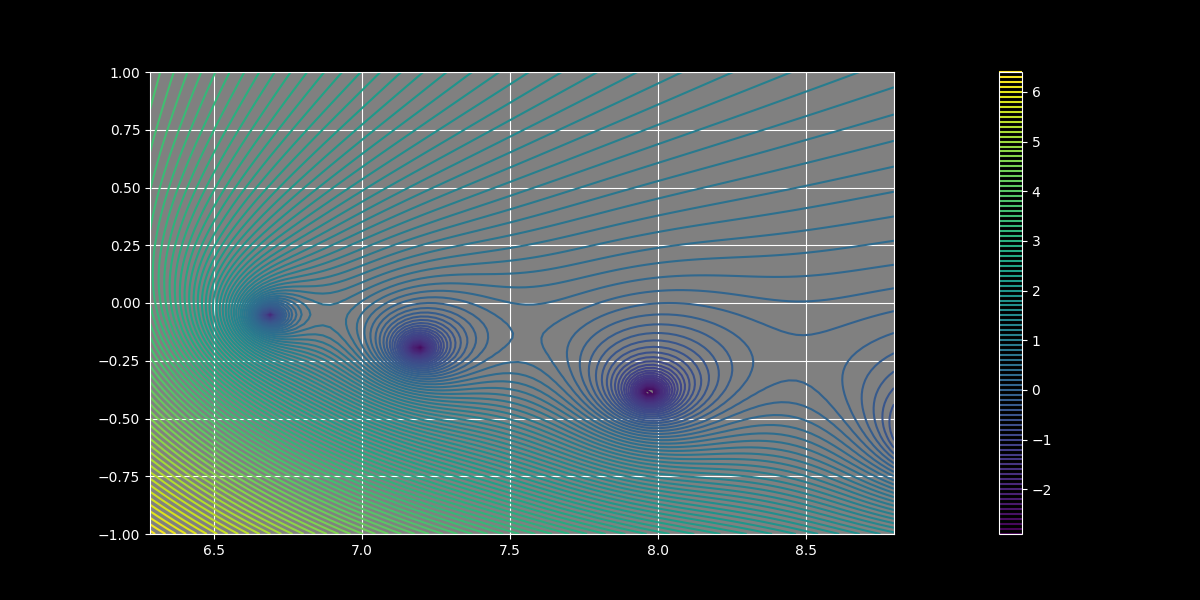

In [11]:
plotlogf(A.determinant_Z, A.K_low, 1.4*A.K_low, -1, 1, 'TE', 'guided',  iref=100, rref=100, levels=100)


In [12]:
Z = newton(A.determinant_Z, np.array([6.7]), args=('TE', 'guided'))
plt.plot(Z.real, Z.imag, 'ro');

Define integration routine

In [13]:
def contour_int(f, c, r, N=10, *fargs):
    
    ts = np.linspace(0, 2*np.pi, N+1)[:-1]
    dt = 2*np.pi / N
    dgamma = 1j * r * np.exp(1j * ts)
    fs = f(c + r * np.exp(1j * ts), *fargs)
    return np.sum(fs * dgamma * dt)

integrand_vec = np.vectorize(integrand)
fargs = (s, x, False)

In [14]:
r = .05
N = 70
contour_int(integrand, Z, r, N, *fargs)

(-1.0682243644050549-0.2974274950931449j)

# Observations

- This one seems to be both non-trivial and converging.  So we should examine the contour integral for delta for the full modes.

Ad-hoc method for looking at contour integral for this function across x range

In [15]:
r = 1e-6
Nc = 10
s = 0

Nx = 80
xs = np.linspace(-2.9, 2.9, Nx)
ys = np.zeros(Nx, dtype=complex)

for i in range(len(xs)):
    fargs = (s, xs[i], False)
    # print(fargs)
    ys[i] = contour_int(integrand, Z, r, Nc, *fargs)


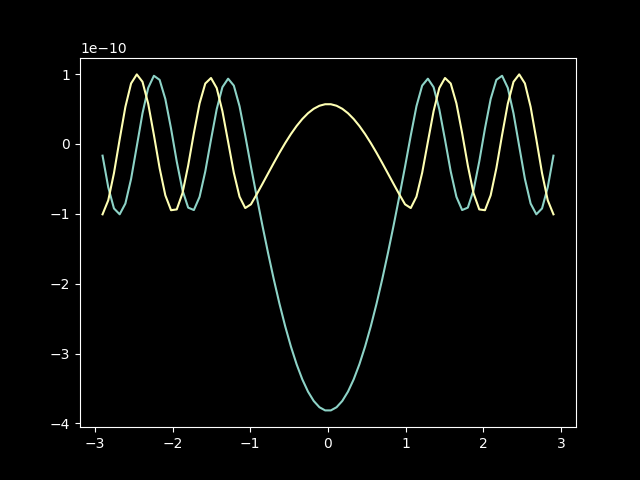

In [16]:
plt.close('all')
plt.plot(xs, ys.real)
plt.plot(xs, ys.imag)

## Contour integral with Propagator class and exact delta function

In [17]:
Propagator = A.propagator()

In [18]:
circ_contour = {'center': Z, 'radius': .05, 'N':100}
paper_method = False

args_even = { 'S': s, 'field_type': 'TE', 'sign': '1', 'paper_method': paper_method}
args_odd = { 'S': s, 'field_type': 'TE', 'sign': '-1', 'paper_method': paper_method}

In [19]:
P_leaky_even = Propagator(exact_transform=A.delta_at_S, Lx=-.5, Rx=.5, 
                          exact_args=args_even, sign='+1', circ_contour=circ_contour, 
                          paper_method=paper_method)

P_leaky_odd = Propagator(exact_transform=A.delta_at_S, Lx=-.5, Rx=.5, 
                         exact_args=args_odd, sign='-1', circ_contour=circ_contour,
                         paper_method=paper_method)

 95% (95 of 100) |#####################  | Elapsed Time: 0:00:00 ETA:   0:00:00

In [20]:
P_ls = [P_leaky_even, P_leaky_odd]
portion = 'full'

full_leaky = lambda x : sum([P.slice_propagate(x, portion=portion) for P in P_ls])
Full_leaky = lambda x, z : sum([P.propagate(x, zs=z, portion=portion) for P in P_ls])

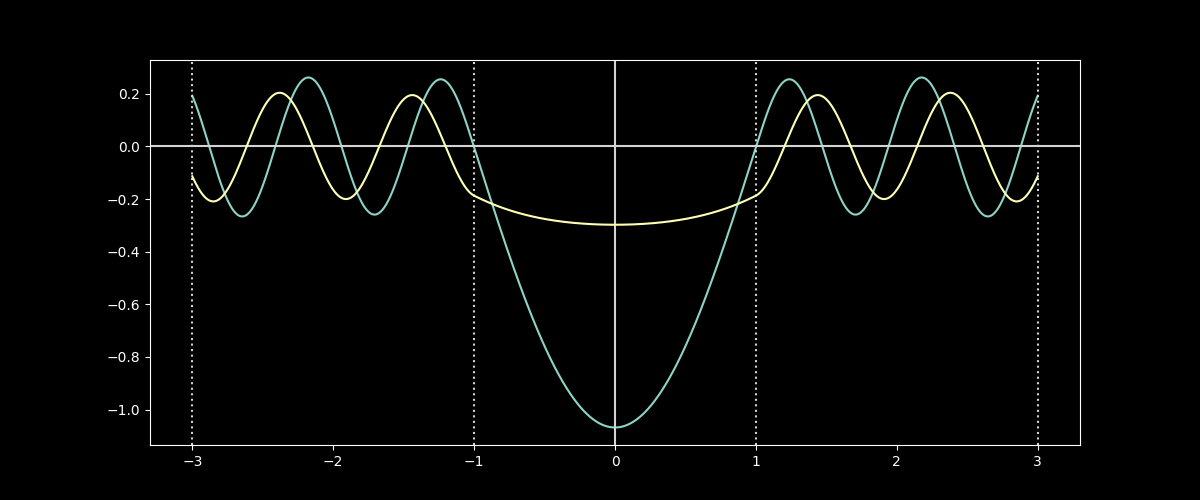

In [21]:
A.plot_field_1d(full_leaky);
A.add_1d_plot(full_leaky, part='imag')

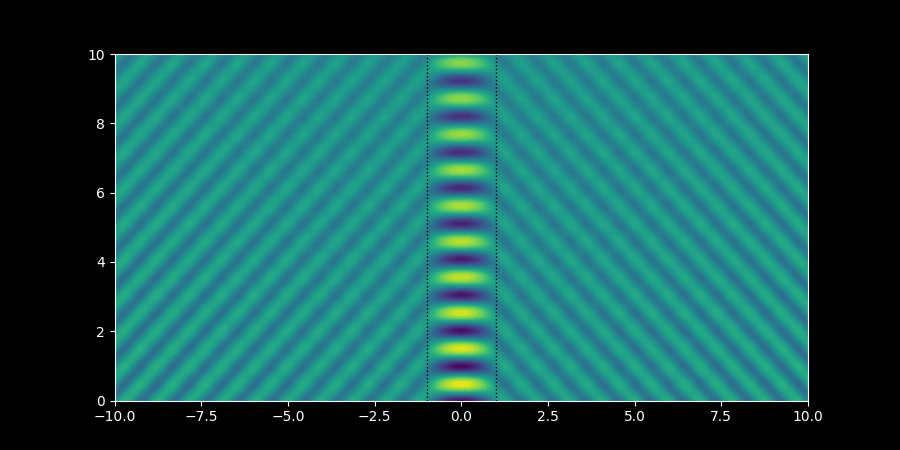

In [22]:
A.plot_field_2d(Full_leaky, xs=np.linspace(-10,10,600), zmin=0, zmax=10, zref=200, maxdim=9, colorbar=False);

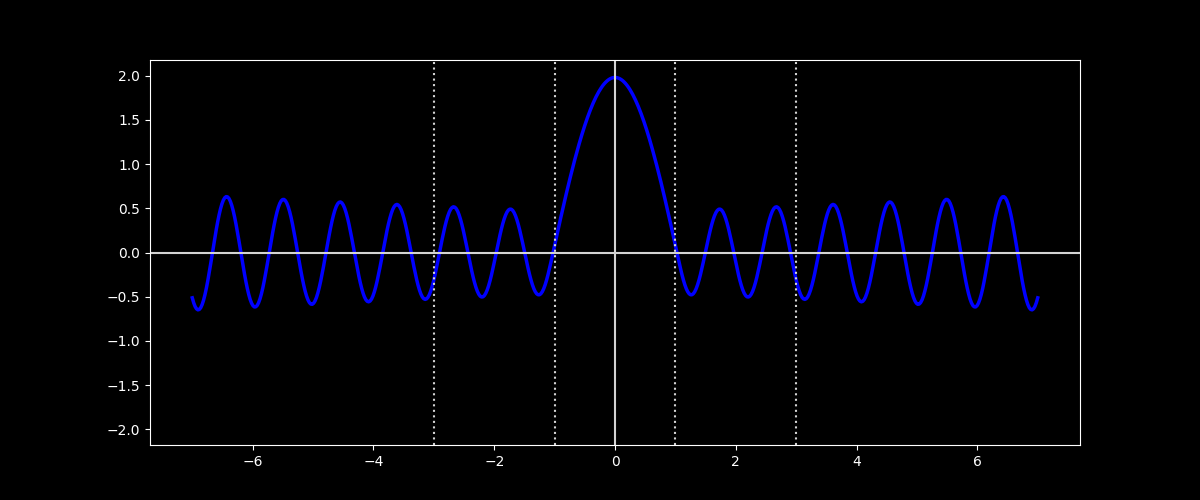

In [31]:
# A.animate_field_1d(full_leaky, 'leaky_real', xs=np.linspace(-7, 7,600), linewidth=2.5, secs=2, fps=25)

In [23]:
Video('leaky_real.mp4', html_attributes="controls loop")


In [379]:
# A.animate_field_1d(full_leaky, 'leaky_imag', xs=np.linspace(-7, 7,600), part='imag', linewidth=2.5, secs=2,color='g', fps=25)

In [24]:
Video('leaky_imag.mp4', html_attributes="controls loop")


In [25]:
# A.animate_field_2d(Full_leaky, 'leaky2d', 1, xs=np.linspace(-10,10,200), zs=np.linspace(0, 10, 100), 
#                    colorbar=False, secs=1, fps=20, levels=20);


In [26]:
Video('leaky2d.mp4', html_attributes="controls loop")
